# HW2 - Q2

In [1]:
import keras
from keras.datasets import reuters
import matplotlib.pyplot as plt
import matplotlib.ticker

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Users\anand\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\anand\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\anand\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\anand\AppData\Roa

In [2]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
np.load = np_load_old

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [5]:
train_labels[10]

3

## Preparing the Data

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [7]:
len(x_train[0])

10000

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building the NN

In [10]:
from keras import models
from keras import layers,regularizers

lambdas=[0.01,0.005,0.001,0.0001,0.00005,0.00001,0.000001]

# Lambda 0

In [11]:
model = models.Sequential()
model.add(layers.Dense(64,kernel_regularizer= regularizers.l2(lambdas[0]), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,kernel_regularizer= regularizers.l2(lambdas[0]) , activation='relu'))
model.add(layers.Dense(46, kernel_regularizer= regularizers.l2(lambdas[0]), activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validating our approach

Setting apart 2,000 samples in our training data to use as a validation set:

In [13]:
x_val = x_train[:2000]
partial_x_train = x_train[2000:]

y_val = one_hot_train_labels[:2000]
partial_y_train = one_hot_train_labels[2000:]

In [14]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='HW2_Q2_lam0.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=35,
                    batch_size=512,
                    validation_data=(x_val, y_val),callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 6982 samples, validate on 2000 samples
Epoch 1/35
6982/6982 [==============================] - 3s 411us/step - loss: 4.3232 - acc: 0.4613 - val_loss: 3.2089 - val_acc: 0.5520
Epoch 2/35
6982/6982 [==============================] - 2s 279us/step - loss: 2.8758 - acc: 0.6091 - val_loss: 2.7115 - val_acc: 0.6400
Epoch 3/35
6982/6982 [==============================] - 2s 279us/step - loss: 2.5221 - acc: 0.6696 - val_loss: 2.4942 - val_acc: 0.6685
Epoch 4/35
6982/6982 [==============================] - 2s 280us/step - loss: 2.3279 - acc: 0.7004 - val_loss: 2.3549 - val_acc: 0.6875
Epoch 5/35
6982/6982 [==============================] - 2s 286us/step - loss: 2.1914 - acc: 0.7140 - val_loss: 2.2686 - val_acc: 0.6810
Epoch 6/35
6982/6982 [==============================] - 2s 285us/step - loss: 2.0847 - acc: 0.7203 - val_loss: 2.1711 - val_acc: 0.6730
Epoch 7/35
6982/6982 [==============================] - 2s 278us/step - loss: 2.0001 - a

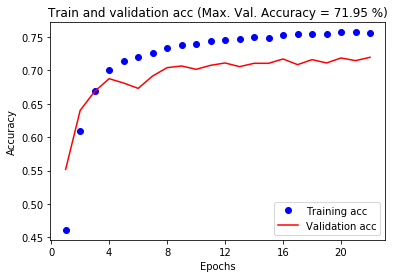

In [15]:
plt.clf()   # clear figure
ax=plt.gca()

acc = history.history['acc']
val_acc_0 = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_0, 'r', label='Validation acc')
plt.title('Train and validation acc (Max. Val. Accuracy = '+str(round(max(val_acc_0)*100,2))+' %)')
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(4))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [16]:
best_epoch_0=val_acc_0.index(max(val_acc_0))+1
print("Best epoch: ",best_epoch_0)

Best epoch:  22


In [17]:
from keras import backend as K
K.clear_session()

# Lambda 1

In [18]:
model = models.Sequential()
model.add(layers.Dense(64,kernel_regularizer= regularizers.l2(lambdas[1]), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,kernel_regularizer= regularizers.l2(lambdas[1]) , activation='relu'))
model.add(layers.Dense(46, kernel_regularizer= regularizers.l2(lambdas[1]), activation='softmax'))

In [19]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='HW2_Q2_lam1.h5', monitor='val_loss', save_best_only=True)]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),callbacks = callbacks)

Train on 6982 samples, validate on 2000 samples
Epoch 1/30
6982/6982 [==============================] - 3s 384us/step - loss: 3.5626 - acc: 0.5190 - val_loss: 2.6261 - val_acc: 0.6025
Epoch 2/30
6982/6982 [==============================] - 2s 288us/step - loss: 2.2791 - acc: 0.6608 - val_loss: 2.1796 - val_acc: 0.6735
Epoch 3/30
6982/6982 [==============================] - 2s 279us/step - loss: 1.9440 - acc: 0.7140 - val_loss: 2.0084 - val_acc: 0.6955
Epoch 4/30
6982/6982 [==============================] - 2s 282us/step - loss: 1.7835 - acc: 0.7442 - val_loss: 1.9196 - val_acc: 0.7075
Epoch 5/30
6982/6982 [==============================] - 2s 290us/step - loss: 1.6761 - acc: 0.7685 - val_loss: 1.8384 - val_acc: 0.7190
Epoch 6/30
6982/6982 [==============================] - 2s 292us/step - loss: 1.6031 - acc: 0.7797 - val_loss: 1.7980 - val_acc: 0.7255
Epoch 7/30
6982/6982 [==============================] - 2s 289us/step - loss: 1.5485 - acc: 0.7915 - val_loss: 1.7647 - val_acc: 0.7290


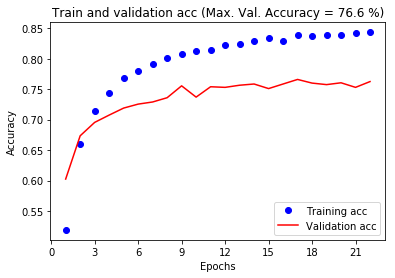

In [21]:
plt.clf()   # clear figure
ax=plt.gca()

acc = history.history['acc']
val_acc_1 = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'r', label='Validation acc')
plt.title('Train and validation acc (Max. Val. Accuracy = '+str(round(max(val_acc_1)*100,2))+' %)')
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(3))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
best_epoch_1=val_acc_1.index(max(val_acc_1))+1
print("Best epoch: ",best_epoch_1)
K.clear_session()

Best epoch:  17


# Lambda 2

In [23]:
model = models.Sequential()
model.add(layers.Dense(64,kernel_regularizer= regularizers.l2(lambdas[2]), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,kernel_regularizer= regularizers.l2(lambdas[2]) , activation='relu'))
model.add(layers.Dense(46, kernel_regularizer= regularizers.l2(lambdas[2]), activation='softmax'))

In [24]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='HW2_Q2_lam2.h5', monitor='val_loss', save_best_only=True)]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val),callbacks = callbacks)

Train on 6982 samples, validate on 2000 samples
Epoch 1/25
6982/6982 [==============================] - 3s 376us/step - loss: 3.1405 - acc: 0.5010 - val_loss: 2.2793 - val_acc: 0.6300
Epoch 2/25
6982/6982 [==============================] - 2s 284us/step - loss: 1.8511 - acc: 0.6835 - val_loss: 1.7040 - val_acc: 0.6790
Epoch 3/25
6982/6982 [==============================] - 2s 292us/step - loss: 1.4131 - acc: 0.7382 - val_loss: 1.5016 - val_acc: 0.7115
Epoch 4/25
6982/6982 [==============================] - 2s 281us/step - loss: 1.1949 - acc: 0.7872 - val_loss: 1.3986 - val_acc: 0.7375
Epoch 5/25
6982/6982 [==============================] - 2s 280us/step - loss: 1.0528 - acc: 0.8227 - val_loss: 1.3341 - val_acc: 0.7590
Epoch 6/25
6982/6982 [==============================] - 2s 332us/step - loss: 0.9475 - acc: 0.8485 - val_loss: 1.3196 - val_acc: 0.7705
Epoch 7/25
6982/6982 [==============================] - 2s 280us/step - loss: 0.8698 - acc: 0.8721 - val_loss: 1.2802 - val_acc: 0.7750


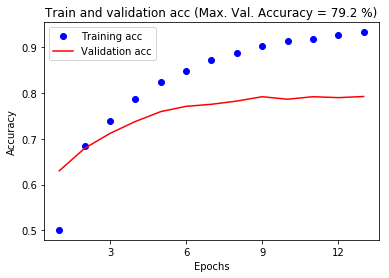

In [26]:
plt.clf()   # clear figure
ax=plt.gca()

acc = history.history['acc']
val_acc_2 = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_2, 'r', label='Validation acc')
plt.title('Train and validation acc (Max. Val. Accuracy = '+str(round(max(val_acc_2)*100,2))+' %)')
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(3))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
best_epoch_2=val_acc_2.index(max(val_acc_2))+1
print("Best epoch: ",best_epoch_2)
K.clear_session()

Best epoch:  13


# Lambda 3 

In [28]:
model = models.Sequential()
model.add(layers.Dense(64,kernel_regularizer= regularizers.l2(lambdas[3]), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,kernel_regularizer= regularizers.l2(lambdas[3]) , activation='relu'))
model.add(layers.Dense(46, kernel_regularizer= regularizers.l2(lambdas[3]), activation='softmax'))

In [29]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='HW2_Q2_lam3.h5', monitor='val_loss', save_best_only=True)]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val),callbacks = callbacks)

Train on 6982 samples, validate on 2000 samples
Epoch 1/25
6982/6982 [==============================] - 3s 360us/step - loss: 2.9824 - acc: 0.4971 - val_loss: 2.0731 - val_acc: 0.6200
Epoch 2/25
6982/6982 [==============================] - 2s 279us/step - loss: 1.6449 - acc: 0.6909 - val_loss: 1.5059 - val_acc: 0.7040
Epoch 3/25
6982/6982 [==============================] - 2s 284us/step - loss: 1.1863 - acc: 0.7625 - val_loss: 1.2972 - val_acc: 0.7380
Epoch 4/25
6982/6982 [==============================] - 2s 278us/step - loss: 0.9413 - acc: 0.8092 - val_loss: 1.2093 - val_acc: 0.7520
Epoch 5/25
6982/6982 [==============================] - 2s 280us/step - loss: 0.7700 - acc: 0.8489 - val_loss: 1.1225 - val_acc: 0.7620
Epoch 6/25
6982/6982 [==============================] - 2s 290us/step - loss: 0.6358 - acc: 0.8781 - val_loss: 1.0720 - val_acc: 0.7845
Epoch 7/25
6982/6982 [==============================] - 2s 284us/step - loss: 0.5292 - acc: 0.9010 - val_loss: 1.0478 - val_acc: 0.7865


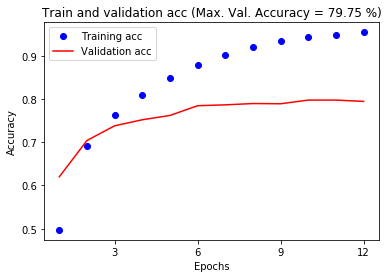

In [31]:
plt.clf()   # clear figure
ax=plt.gca()

acc = history.history['acc']
val_acc_3 = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_3, 'r', label='Validation acc')
plt.title('Train and validation acc (Max. Val. Accuracy = '+str(round(max(val_acc_3)*100,2))+' %)')
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(3))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [32]:
best_epoch_3=val_acc_3.index(max(val_acc_3))+1
print("Best epoch: ",best_epoch_3)

K.clear_session()

Best epoch:  11


# Lambda 4

In [33]:
model = models.Sequential()
model.add(layers.Dense(64,kernel_regularizer= regularizers.l2(lambdas[4]), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,kernel_regularizer= regularizers.l2(lambdas[4]) , activation='relu'))
model.add(layers.Dense(46, kernel_regularizer= regularizers.l2(lambdas[4]), activation='softmax'))

In [34]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='HW2_Q2_lam4.h5', monitor='val_loss', save_best_only=True)]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),callbacks = callbacks)

Train on 6982 samples, validate on 2000 samples
Epoch 1/20
6982/6982 [==============================] - 3s 371us/step - loss: 2.7242 - acc: 0.5302 - val_loss: 1.8413 - val_acc: 0.6185
Epoch 2/20
6982/6982 [==============================] - 2s 287us/step - loss: 1.4828 - acc: 0.6906 - val_loss: 1.4339 - val_acc: 0.6860
Epoch 3/20
6982/6982 [==============================] - 2s 286us/step - loss: 1.1169 - acc: 0.7621 - val_loss: 1.2726 - val_acc: 0.7240
Epoch 4/20
6982/6982 [==============================] - 2s 284us/step - loss: 0.8980 - acc: 0.8129 - val_loss: 1.1767 - val_acc: 0.7465
Epoch 5/20
6982/6982 [==============================] - 2s 287us/step - loss: 0.7319 - acc: 0.8509 - val_loss: 1.0952 - val_acc: 0.7675
Epoch 6/20
6982/6982 [==============================] - 2s 285us/step - loss: 0.5993 - acc: 0.8774 - val_loss: 1.1373 - val_acc: 0.7450
Epoch 7/20
6982/6982 [==============================] - 2s 285us/step - loss: 0.4957 - acc: 0.9015 - val_loss: 1.0368 - val_acc: 0.7815


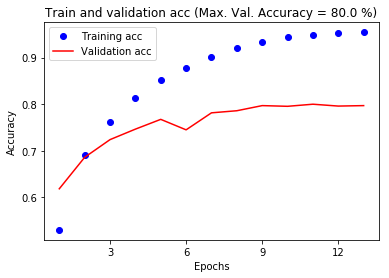

In [36]:
plt.clf()   # clear figure
ax=plt.gca()

acc = history.history['acc']
val_acc_4 = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_4, 'r', label='Validation acc')
plt.title('Train and validation acc (Max. Val. Accuracy = '+str(round(max(val_acc_4)*100,2))+' %)')
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(3))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [37]:
best_epoch_4=val_acc_4.index(max(val_acc_4))+1
print("Best epoch: ",best_epoch_4)
K.clear_session()

Best epoch:  11


# Lambda 5

In [38]:
model = models.Sequential()
model.add(layers.Dense(64,kernel_regularizer= regularizers.l2(lambdas[5]), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,kernel_regularizer= regularizers.l2(lambdas[5]) , activation='relu'))
model.add(layers.Dense(46, kernel_regularizer= regularizers.l2(lambdas[5]), activation='softmax'))

In [39]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='HW2_Q2_lam5.h5', monitor='val_loss', save_best_only=True)]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),callbacks = callbacks)

Train on 6982 samples, validate on 2000 samples
Epoch 1/20
6982/6982 [==============================] - 3s 391us/step - loss: 2.7596 - acc: 0.5162 - val_loss: 1.8948 - val_acc: 0.6185
Epoch 2/20
6982/6982 [==============================] - 2s 299us/step - loss: 1.5199 - acc: 0.7009 - val_loss: 1.4508 - val_acc: 0.6955
Epoch 3/20
6982/6982 [==============================] - 2s 284us/step - loss: 1.1163 - acc: 0.7716 - val_loss: 1.2599 - val_acc: 0.7350
Epoch 4/20
6982/6982 [==============================] - 2s 299us/step - loss: 0.8816 - acc: 0.8182 - val_loss: 1.1523 - val_acc: 0.7560
Epoch 5/20
6982/6982 [==============================] - 2s 287us/step - loss: 0.7033 - acc: 0.8553 - val_loss: 1.0824 - val_acc: 0.7705
Epoch 6/20
6982/6982 [==============================] - 2s 278us/step - loss: 0.5690 - acc: 0.8831 - val_loss: 1.0500 - val_acc: 0.7785
Epoch 7/20
6982/6982 [==============================] - 2s 282us/step - loss: 0.4618 - acc: 0.9069 - val_loss: 0.9966 - val_acc: 0.7935


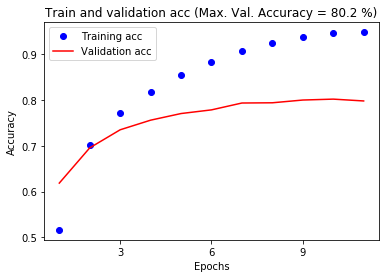

In [41]:
plt.clf()   # clear figure
ax=plt.gca()

acc = history.history['acc']
val_acc_5 = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_5, 'r', label='Validation acc')
plt.title('Train and validation acc (Max. Val. Accuracy = '+str(round(max(val_acc_5)*100,2))+' %)')
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(3))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [42]:
best_epoch_5=val_acc_5.index(max(val_acc_5))+1
print("Best epoch: ",best_epoch_5)
K.clear_session()

Best epoch:  10


# Lambda 6

In [43]:
model = models.Sequential()
model.add(layers.Dense(64,kernel_regularizer= regularizers.l2(lambdas[6]), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,kernel_regularizer= regularizers.l2(lambdas[6]) , activation='relu'))
model.add(layers.Dense(46, kernel_regularizer= regularizers.l2(lambdas[6]), activation='softmax'))

In [44]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='HW2_Q2_lam6.h5', monitor='val_loss', save_best_only=True)]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),callbacks = callbacks)

Train on 6982 samples, validate on 2000 samples
Epoch 1/20
6982/6982 [==============================] - 3s 377us/step - loss: 2.6699 - acc: 0.5115 - val_loss: 1.8437 - val_acc: 0.6165
Epoch 2/20
6982/6982 [==============================] - 2s 283us/step - loss: 1.5027 - acc: 0.6828 - val_loss: 1.4490 - val_acc: 0.6905
Epoch 3/20
6982/6982 [==============================] - 2s 280us/step - loss: 1.1318 - acc: 0.7579 - val_loss: 1.2697 - val_acc: 0.7150
Epoch 4/20
6982/6982 [==============================] - 2s 287us/step - loss: 0.8898 - acc: 0.8062 - val_loss: 1.1677 - val_acc: 0.7465
Epoch 5/20
6982/6982 [==============================] - 2s 286us/step - loss: 0.7074 - acc: 0.8525 - val_loss: 1.1040 - val_acc: 0.7610
Epoch 6/20
6982/6982 [==============================] - 2s 288us/step - loss: 0.5634 - acc: 0.8867 - val_loss: 1.0397 - val_acc: 0.7705
Epoch 7/20
6982/6982 [==============================] - 2s 295us/step - loss: 0.4562 - acc: 0.9089 - val_loss: 1.0593 - val_acc: 0.7765


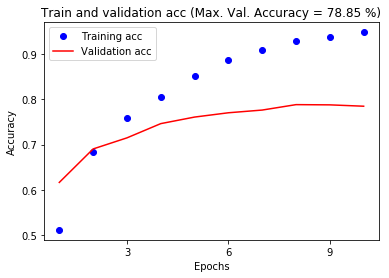

In [46]:
plt.clf()   # clear figure
ax=plt.gca()

acc = history.history['acc']
val_acc_6 = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_6, 'r', label='Validation acc')
plt.title('Train and validation acc (Max. Val. Accuracy = '+str(round(max(val_acc_6)*100,2))+' %)')
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(3))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [47]:
best_epoch_6=val_acc_6.index(max(val_acc_6))+1
print("Best epoch: ",best_epoch_6)
K.clear_session()

Best epoch:  8


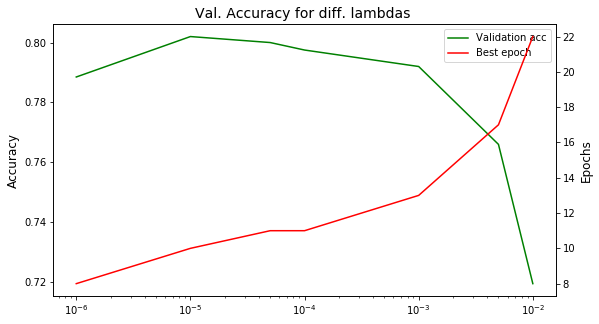

In [48]:
plt.clf()   # clear figure
plt.figure(figsize=(12,6))
fig, host = plt.subplots(figsize=(9,5))
par1 = host.twinx()
ax=plt.gca()

val_acc = [max(val_acc_0),max(val_acc_1),max(val_acc_2),max(val_acc_3),max(val_acc_4),max(val_acc_5),max(val_acc_6)]
best_epoch=[best_epoch_0,best_epoch_1,best_epoch_2,best_epoch_3,best_epoch_4,best_epoch_5,best_epoch_6]

p1, = host.plot(lambdas, val_acc, 'g', label='Validation acc')
p2, = par1.plot(lambdas, best_epoch, 'r-', label='Best epoch')


plt.title('Val. Accuracy for diff. lambdas ',fontsize=14)
plt.xscale("log")
plt.xlabel('Lambdas')
host.set_ylabel('Accuracy',fontsize=12)
par1.set_ylabel('Epochs',fontsize=12)
lines = [p1, p2]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

In [49]:
print("Best validation accuracy: ",round(max(val_acc)*100,2))
print("Optimal lambda Parameter: ",lambdas[val_acc.index(max(val_acc))])

Best validation accuracy:  80.2
Optimal lambda Parameter:  1e-05
